# ДЗ: Анализ данных

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

* Получите из seaborn датасет ирисов.
* Проанализируйте данные с помощью группировки и получите статистику с помощью pandas.
* Постройте графики по этим данным с помощью seaborn.

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# количество выборок для каждого вида ирисов
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


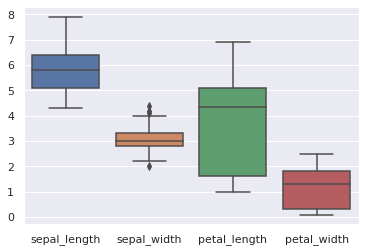

In [6]:
sns.boxplot(data=iris);

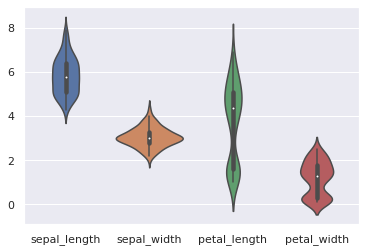

In [7]:
sns.violinplot(data=iris);

In [8]:
# пропущенные значения
pd.isnull(iris).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
# средние значения размеров лепестков и чашелистиков по видам ирисов
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


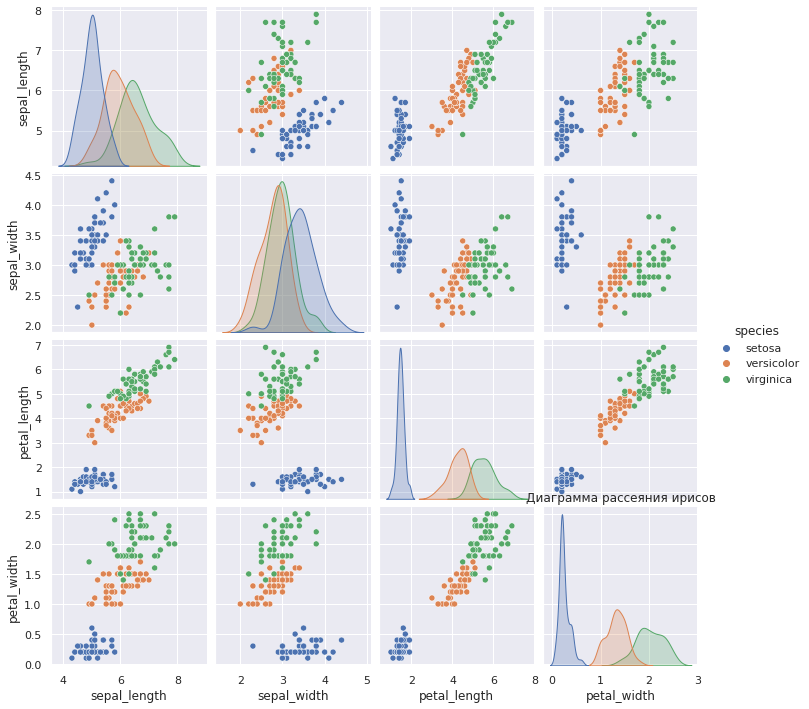

In [10]:
sns.pairplot(iris, hue='species', size=2.5);
plt.title("Диаграмма рассеяния ирисов");

**Классификация набора данных Iris**

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [12]:
X = iris.drop('species', axis=1)
X.shape

(150, 4)

In [13]:
y = iris['species']
y.shape

(150,)

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=21, test_size=0.25)

In [15]:
model = GaussianNB()
# model = KNeighborsClassifier(n_neighbors=1)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [16]:
accuracy_score(ytest, ypred)

0.9210526315789473

In [17]:
scores = cross_val_score(model, X, y, cv=5)
scores.mean()

0.9533333333333334